# **Linear Regression Model** #

## **1. Import libraries** ##

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

## **2. Load the dataset in seaborn library** ##

In [41]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **3. Variable Names** ##

In [78]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.1 KB


The table provides us some general insights about our "tips" dataset. We have 244 observations and 7 columns in this dataset, each columns represent a variable name. 
## **3.1 Cleaning the dataset** ##
Some dataset may have missing values, which will gives us false insights and information if we use them to compute. Therefore, we will check if there is any missing values (or null data) in this dataset. Usually, built in dataset is cleaned so we can skip this step, but here is a demonstration of how to do this:

<AxesSubplot:>

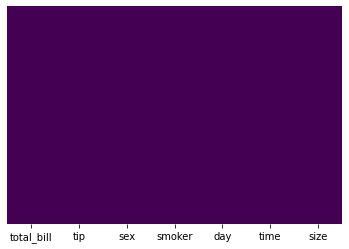

In [80]:
sns.heatmap(tips.isnull(),yticklabels=False,cbar=False,cmap='viridis')

There is no bar shown in this graph, which means there are no missing values in this graph. But if there is we will have to go through a step called imputation data. Next step, we will compute a statistics summary of our dataset.

In [42]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


### **Identify output and input** ###
We want to predict the tips that we get as a server for the restaurants depends on the amount of the bills.
Therefore, 

Input (or independent variables) will be "total_bill"

Output(or dependent variables) will be "tips"


In [43]:
X = tips[['total_bill']]

In [44]:
y = tips[['tip']]

Our hypothesis is the higher amount of total_bill, we will get better tips. This hypothesis is suitable with linear regression model. So now we will try to train our model 

## **4. Build Prediction Model** ##

### **Import libraries from Sklearn** ##

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import RANSACRegressor


### **Split the dataset into 2 parts: training and testing** ###

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=100)

In [94]:
# Fit model with Linear Regression algorithm
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

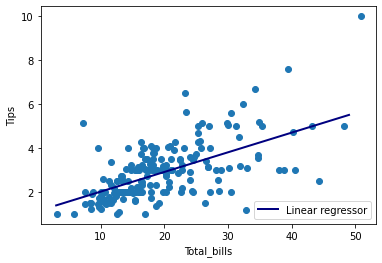

In [109]:
model.fit(X_train,y_train)
line_X=np.arange(3,51,2)
line_Y=model.predict(line_X[:,np.newaxis])
plt.scatter(x=X_train,y=y_train);
plt.plot(line_X, line_y, color='navy', linewidth=2, label='Linear regressor')
plt.legend(loc='lower right')
plt.xlabel("Total_bills")
plt.ylabel("Tips")
plt.show()

### **Evaluate the model** ###

In [110]:
y_pred = model.predict(X_test)
print("MAE of model: ",mean_absolute_error(y_true=y_test,y_pred= y_pred))
print("MSE of model: ",mean_absolute_error(y_true=y_test,y_pred=y_pred))
print("R2: ", r2_score(y_true=y_test,y_pred=y_pred))
print("Linear coeffiecient", model.coef_)

MAE of model:  0.7905106615177849
MSE of model:  0.7905106615177849
R2:  0.5526523070844245
Linear coeffiecient [[0.09673153]]


Why do we stop here? Let's deepen our knowledge of linear regression... So let's try robust regression!! Robust regression uses different algorithms to detect outliers or influential observations and lessens the weights of these. Here I will try to use RANSACRegression, an algorithm that will remove the data point that are outliers, commonly use in removing noises in Computer Vision.
1. Create an object of RANSACRegressor
2. Fit the model to the algorithm 
3. Plots to see the difference
4. Use our models to predict
5. Compare the prediction between Linear Regression and RANSAC regression.

R2: 0.5218930802613073
MAE: 0.8247991854002368
MSE: 1.2827609851358606
RootMSE: 1.1325903871814649
coefficient:  [[0.0895594]]


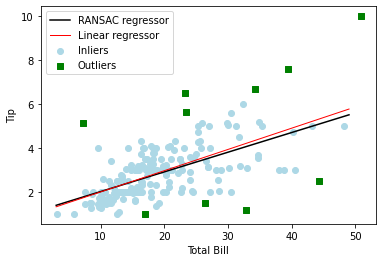

In [113]:
ransacReg1= RANSACRegressor(LinearRegression(),residual_threshold=2,random_state=0)
ransacReg1.fit(X_train, y_train)
inlier=ransacReg1.inlier_mask_
outlier=np.logical_not(inlier)
line_X=np.arange(3,51,2)
line_y=ransacReg1.predict(line_X[:,np.newaxis])
# Scatter plot of the data
plt.scatter(X_train[inlier],y_train[inlier],c='lightblue',marker='o',label='Inliers')
plt.scatter(X_train[outlier],y_train[outlier],c='green',marker='s',label='Outliers')
# Line of best fit using RANSACregressor
plt.plot(line_X,line_y,color='black',label="RANSAC regressor")
# Line of best fit using linear regression 
plt.plot(line_X, line_Y, color='red', linewidth=1, label='Linear regressor')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(loc='upper left')
y_pred = ransacReg1.predict(X_test)
r_squared = r2_score(y_true=y_test,y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
mse = mean_squared_error(y_true=y_test,y_pred=y_pred)
print("R2:",r_squared)
print("MAE:",mae)
print("MSE:",mse)
print("RootMSE:",np.sqrt(mse))
print("coefficient: ",ransacReg1.estimator_.coef_)


In this case, it turns out that normal linear regressor predicts slightly better than RANSACregressor algorithms. 